<a href="https://colab.research.google.com/github/Obreintelly/Crypto_Forecast_R/blob/main/Group_1_Project_Week_Supervised_Machine_Learning_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Overview and Introduction**

**a) Context**
Is the crypto-dash a bubble? The craze around cryptocurrencies given their astounding volatility puzzles many plociy makers involved. Is it an investment worth making?


**b) Research Question**

We investigate the performance of bitcoin over the years and forecast its future price.

**c) Metric For Success**
Model that tracks performance of bitcoin accurately and provides a forecast

**d) Experimental Design**

1. Install relevant libraries and packages

2. EDA

3. Modelling

# **2. Installing Packages**

In [2]:
install.packages('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




# **3. Relevant Libraries**

In [3]:
library(quantmod)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
#Importing Bitcoin Data
bitcoin <- getSymbols("BTC-USD",
           from = "2016/12/31",
           to = "2020/01/01",
           periodicity = "daily",
           auto.assign = FALSE)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




# **4. Exploring the Datasets**

In [5]:
#Previewing the first 6 rows
head(bitcoin)

           BTC-USD.Open BTC-USD.High BTC-USD.Low BTC-USD.Close BTC-USD.Volume
2016-12-31      960.627      963.743     947.236       963.743       99135104
2017-01-01      963.658     1003.080     958.699       998.325      147775008
2017-01-02      998.617     1031.390     996.702      1021.750      222184992
2017-01-03     1021.600     1044.080    1021.600      1043.840      185168000
2017-01-04     1044.400     1159.420    1044.400      1154.730      344945984
2017-01-05     1156.730     1191.100     910.417      1013.380      510199008
           BTC-USD.Adjusted
2016-12-31          963.743
2017-01-01          998.325
2017-01-02         1021.750
2017-01-03         1043.840
2017-01-04         1154.730
2017-01-05         1013.380

In [6]:
#Previewing the last 6 rows

tail(bitcoin)

           BTC-USD.Open BTC-USD.High BTC-USD.Low BTC-USD.Close BTC-USD.Volume
2019-12-27     7238.141     7363.529    7189.934      7290.088    22777360996
2019-12-28     7289.031     7399.041    7286.905      7317.990    21365673026
2019-12-29     7317.647     7513.948    7279.865      7422.653    22445257702
2019-12-30     7420.273     7454.824    7276.308      7292.995    22874131672
2019-12-31     7294.439     7335.290    7169.778      7193.599    21167946112
2020-01-01     7194.892     7254.331    7174.944      7200.174    18565664997
           BTC-USD.Adjusted
2019-12-27         7290.088
2019-12-28         7317.990
2019-12-29         7422.653
2019-12-30         7292.995
2019-12-31         7193.599
2020-01-01         7200.174

In [7]:
#Importing Both Bitcoin, Etherium and Lite Coin for deeper analysis
crypto <-lapply(c("BTC-USD", "ETH-USD", "LTC-USD"), function(x) {getSymbols(x, 
                                                 from = "2016/12/31", 
                                                 to = "2020/01/01",
                                                 periodicity = "daily",
                                                 auto.assign=FALSE)} )
names(crypto) <- c("BTC-USD", "ETH-USD", "LTC-USD")

In [8]:
#Importing an index that tracks stock prices
djia <- getSymbols("DJIA",
           from = "2016/12/31",
           to = "2020/01/01",
           periodicity = "daily",
           auto.assign = FALSE)

In [9]:
#Previewing Crypto Dataset

head(crypto$`BTC-USD`)

           BTC-USD.Open BTC-USD.High BTC-USD.Low BTC-USD.Close BTC-USD.Volume
2016-12-31      960.627      963.743     947.236       963.743       99135104
2017-01-01      963.658     1003.080     958.699       998.325      147775008
2017-01-02      998.617     1031.390     996.702      1021.750      222184992
2017-01-03     1021.600     1044.080    1021.600      1043.840      185168000
2017-01-04     1044.400     1159.420    1044.400      1154.730      344945984
2017-01-05     1156.730     1191.100     910.417      1013.380      510199008
           BTC-USD.Adjusted
2016-12-31          963.743
2017-01-01          998.325
2017-01-02         1021.750
2017-01-03         1043.840
2017-01-04         1154.730
2017-01-05         1013.380

In [10]:
head(crypto$`ETH-USD`)

           ETH-USD.Open ETH-USD.High ETH-USD.Low ETH-USD.Close ETH-USD.Volume
2016-12-31      8.15115      8.15856     7.90938       7.96910        9066800
2017-01-01      7.98231      8.47123     7.98231       8.17257       14731700
2017-01-02      8.17087      8.43633     8.05441       8.37851       14579600
2017-01-03      8.37458      9.99680     8.31717       9.72525       33625200
2017-01-04      9.70929     11.27640     9.55981      11.25160       41051200
2017-01-05     11.28680     11.89090     9.40268      10.25440       41557400
           ETH-USD.Adjusted
2016-12-31          7.96910
2017-01-01          8.17257
2017-01-02          8.37851
2017-01-03          9.72525
2017-01-04         11.25160
2017-01-05         10.25440

In [11]:
head(crypto$`LTC-USD`)

           LTC-USD.Open LTC-USD.High LTC-USD.Low LTC-USD.Close LTC-USD.Volume
2016-12-31      4.39233      4.40377     4.28693       4.32529        9210720
2017-01-01      4.32912      4.52153     4.32871       4.51159       11337500
2017-01-02      4.52045      4.73766     4.48466       4.64894       14595300
2017-01-03      4.65588      4.73184     4.56487       4.62620       10055700
2017-01-04      4.63375      4.83785     4.63375       4.83785       13762400
2017-01-05      4.91437      4.94586     4.22687       4.29272       19196000
           LTC-USD.Adjusted
2016-12-31          4.32529
2017-01-01          4.51159
2017-01-02          4.64894
2017-01-03          4.62620
2017-01-04          4.83785
2017-01-05          4.29272

In [12]:
tail(crypto$`BTC-USD`)

           BTC-USD.Open BTC-USD.High BTC-USD.Low BTC-USD.Close BTC-USD.Volume
2019-12-27     7238.141     7363.529    7189.934      7290.088    22777360996
2019-12-28     7289.031     7399.041    7286.905      7317.990    21365673026
2019-12-29     7317.647     7513.948    7279.865      7422.653    22445257702
2019-12-30     7420.273     7454.824    7276.308      7292.995    22874131672
2019-12-31     7294.439     7335.290    7169.778      7193.599    21167946112
2020-01-01     7194.892     7254.331    7174.944      7200.174    18565664997
           BTC-USD.Adjusted
2019-12-27         7290.088
2019-12-28         7317.990
2019-12-29         7422.653
2019-12-30         7292.995
2019-12-31         7193.599
2020-01-01         7200.174

In [13]:
tail(crypto$`ETH-USD`)

           ETH-USD.Open ETH-USD.High ETH-USD.Low ETH-USD.Close ETH-USD.Volume
2019-12-27     126.3688     128.0976    124.8208      127.2146     8299390176
2019-12-28     127.2130     130.2582    126.8997      128.3227     8069298610
2019-12-29     128.2669     136.8112    127.9977      134.7580     9708776786
2019-12-30     134.7965     136.7574    131.5456      132.6335     9796951716
2019-12-31     132.6123     133.7327    128.7982      129.6109     8936866397
2020-01-01     129.6307     132.8354    129.1983      130.8020     7935230330
           ETH-USD.Adjusted
2019-12-27         127.2146
2019-12-28         128.3227
2019-12-29         134.7580
2019-12-30         132.6335
2019-12-31         129.6109
2020-01-01         130.8020

In [14]:
tail(crypto$`LTC-USD`)

           LTC-USD.Open LTC-USD.High LTC-USD.Low LTC-USD.Close LTC-USD.Volume
2019-12-27     40.26174     41.65152    39.96437      41.17817     2949759036
2019-12-28     41.16516     43.81186    41.12906      42.84252     3260638656
2019-12-29     42.79774     44.44959    42.43944      43.67066     3573796558
2019-12-30     43.75393     44.60400    42.43144      42.74734     3330795171
2019-12-31     42.76611     43.06095    41.17047      41.34007     3015923778
2020-01-01     41.32653     42.28502    41.28803      42.01772     2782992323
           LTC-USD.Adjusted
2019-12-27         41.17817
2019-12-28         42.84252
2019-12-29         43.67066
2019-12-30         42.74734
2019-12-31         41.34007
2020-01-01         42.01772

In [15]:
head(djia)

           DJIA.Open DJIA.High DJIA.Low DJIA.Close DJIA.Volume DJIA.Adjusted
2017-01-03  19872.86  20021.60 19694.36   19881.76  3770530000      19881.76
2017-01-04  19890.94  20037.42 19812.15   19942.16  3764890000      19942.16
2017-01-05  19922.56  20031.40 19747.60   19899.29  3761820000      19899.29
2017-01-06  19906.96  20048.52 19781.19   19963.80  3339890000      19963.80
2017-01-09  19931.41  20021.53 19807.52   19887.38  3217610000      19887.38
2017-01-10  19876.35  20007.46 19745.44   19855.53  3638790000      19855.53

In [16]:
tail(djia)

           DJIA.Open DJIA.High DJIA.Low DJIA.Close DJIA.Volume DJIA.Adjusted
2019-12-23  28491.78  28582.49 28491.78   28551.53  3060610000      28551.53
2019-12-24  28572.57  28576.80 28503.21   28515.45  1296540000      28515.45
2019-12-26  28539.46  28624.10 28535.15   28621.39  2160680000      28621.39
2019-12-27  28675.34  28701.66 28608.98   28645.26  2428670000      28645.26
2019-12-30  28654.76  28664.69 28428.98   28462.14  3013290000      28462.14
2019-12-31  28414.64  28547.35 28376.49   28538.44  2893810000      28538.44

In [17]:
#Dimension of Bitcoin Dataset
dim(crypto$`BTC-USD`)

[1] 1097    6

In [18]:
#Dimension of Etherium Dataset
dim(crypto$`ETH-USD`)

[1] 1097    6

In [19]:
#Dimension of LiteCoin

dim(crypto$`LTC-USD`)

[1] 1097    6

In [20]:
dim(djia)

[1] 754   6

# **5. Data Cleaning**

In [21]:
#More packages and libraries to help with visualization
install.packages("DataExplorer") 

install.packages("VIM") 

library(DataExplorer)

library(VIM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




In [22]:
#Checking for duplicates in the dataset

any(duplicated(crypto))

#There are no duplicated rows in the dataset

[1] FALSE

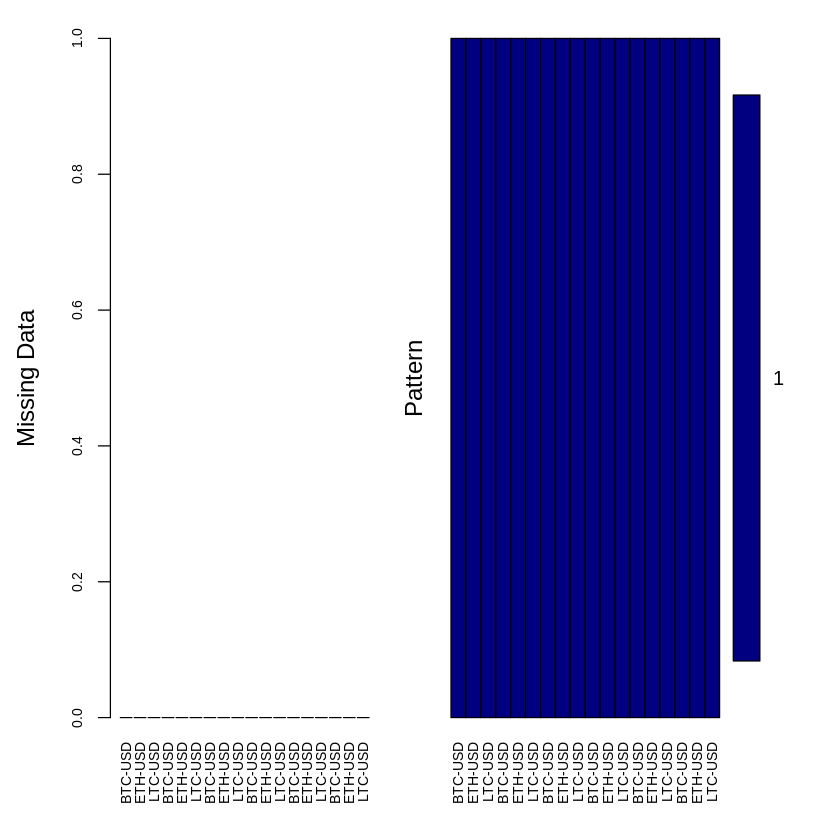

In [23]:
#Visualizing Pattern of NAs in the crypto

mp <- aggr(crypto, col=c('navyblue', 'yellow'), 
numbers=TRUE, sortvars=TRUE, labels=names(crypto), cex.axis =.7, gap=3, ylab=c("Missing Data", "Pattern"))

There are no missing values in the dataset

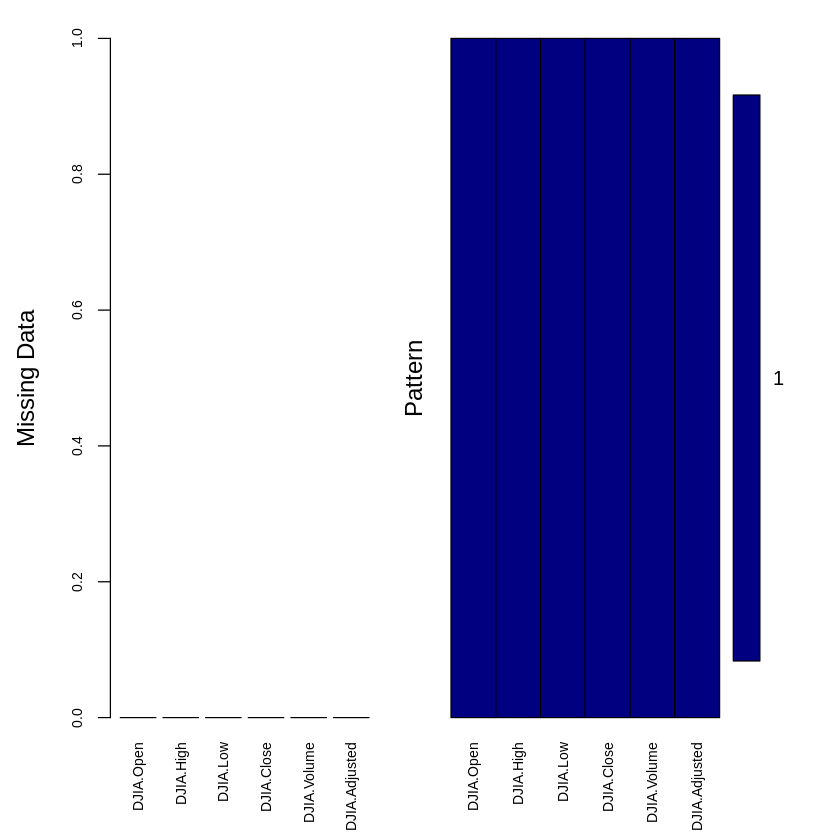

In [24]:
#Checking for missing values in the index
mp <- aggr(djia, col=c('navyblue', 'yellow'), 
numbers=TRUE, sortvars=TRUE, labels=names(djia), cex.axis =.7, gap=3, ylab=c("Missing Data", "Pattern"))

# **6. Outlier Detection**

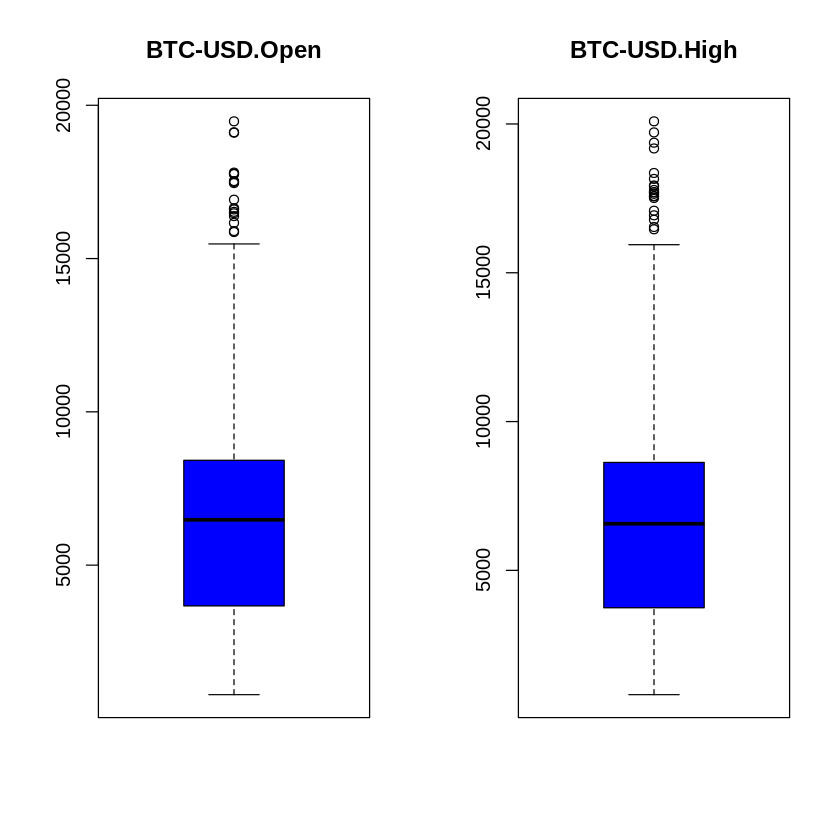

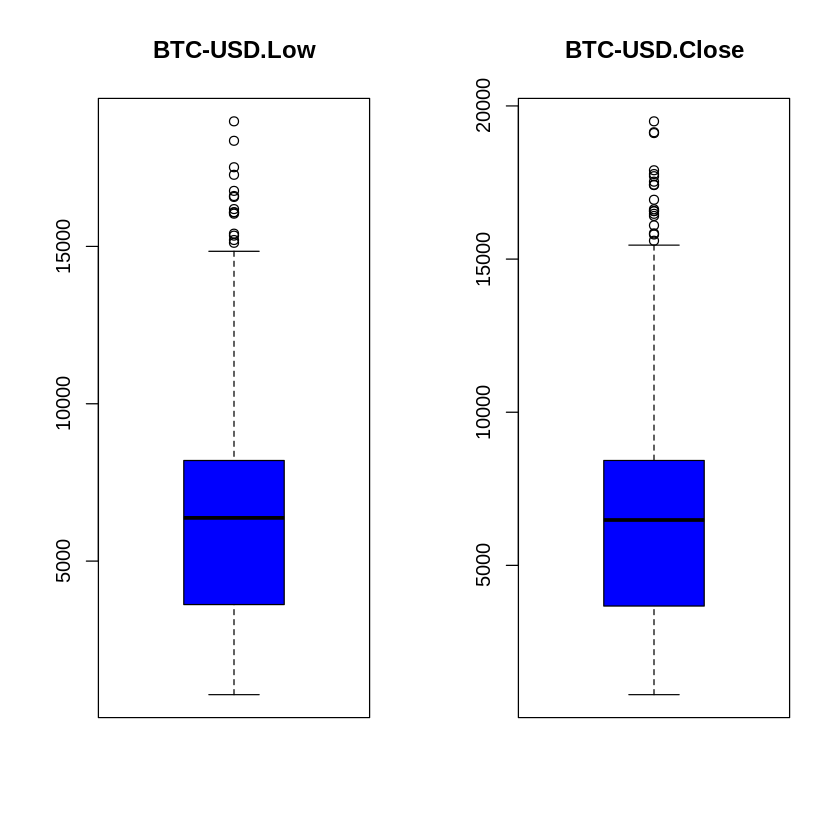

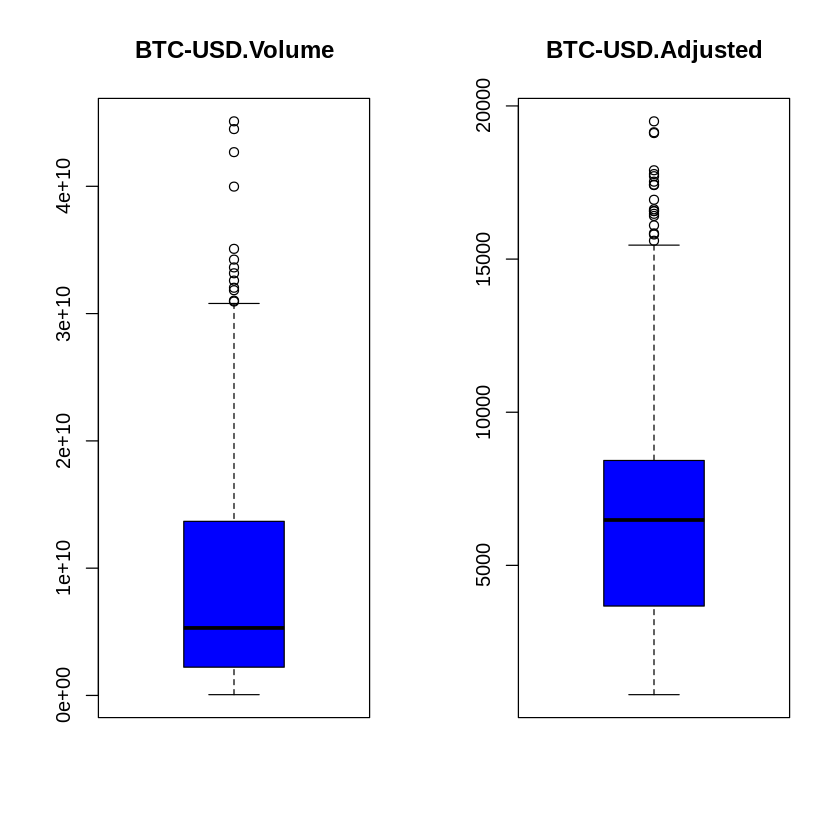

In [25]:
#Outlier Detection in the Bitcoin DF
par(mfrow=c(1,2))
for(i in 1:6) {
	boxplot(crypto$`BTC-USD`[,i], main=names(crypto$`BTC-USD`)[i], col = "blue")}

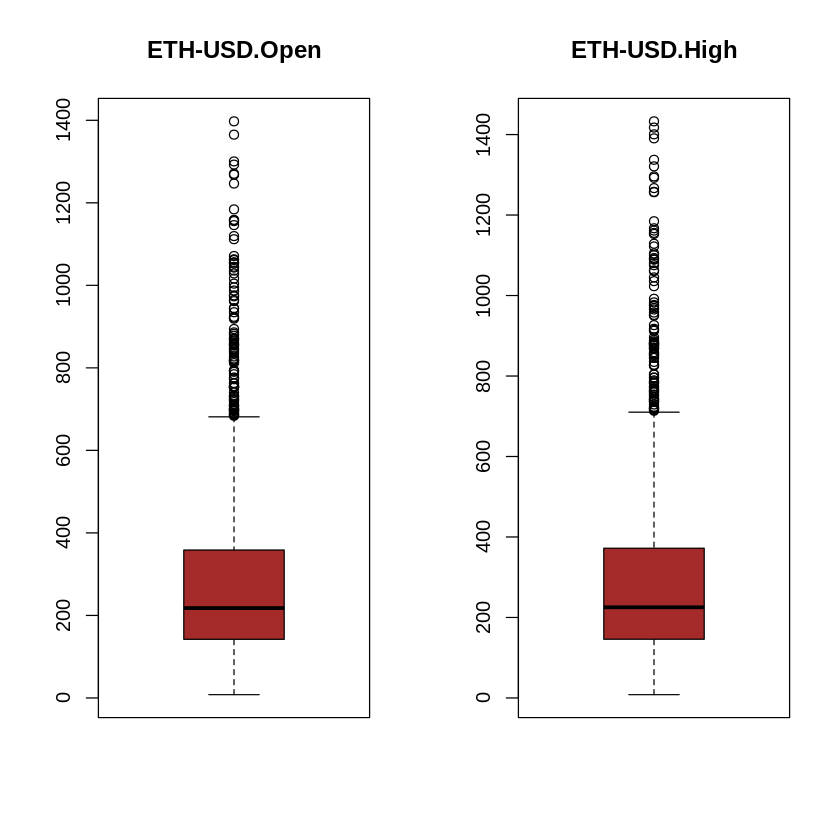

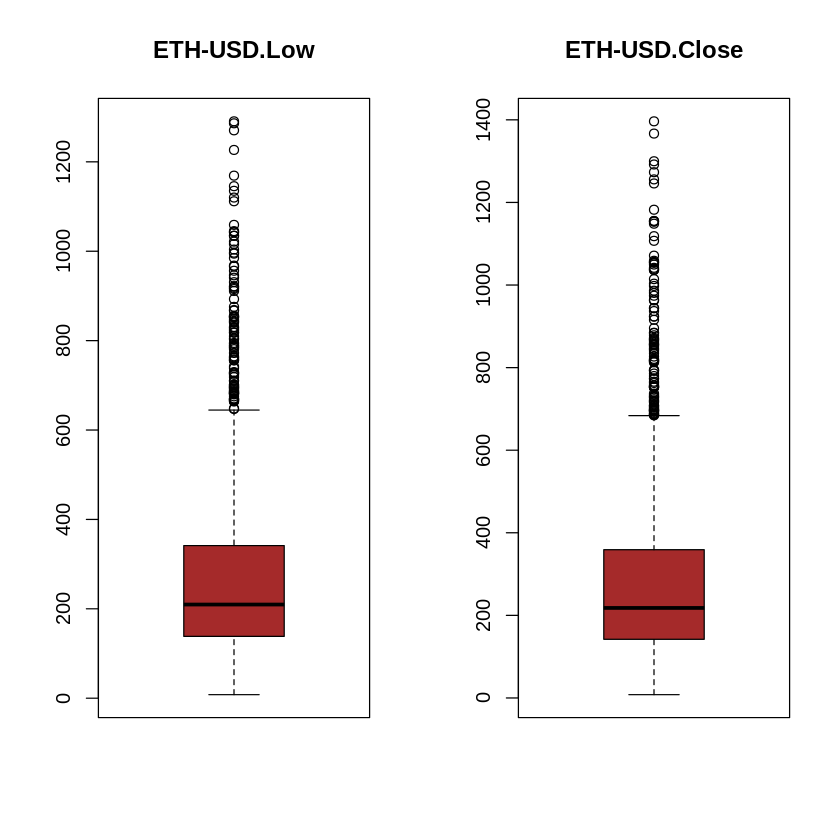

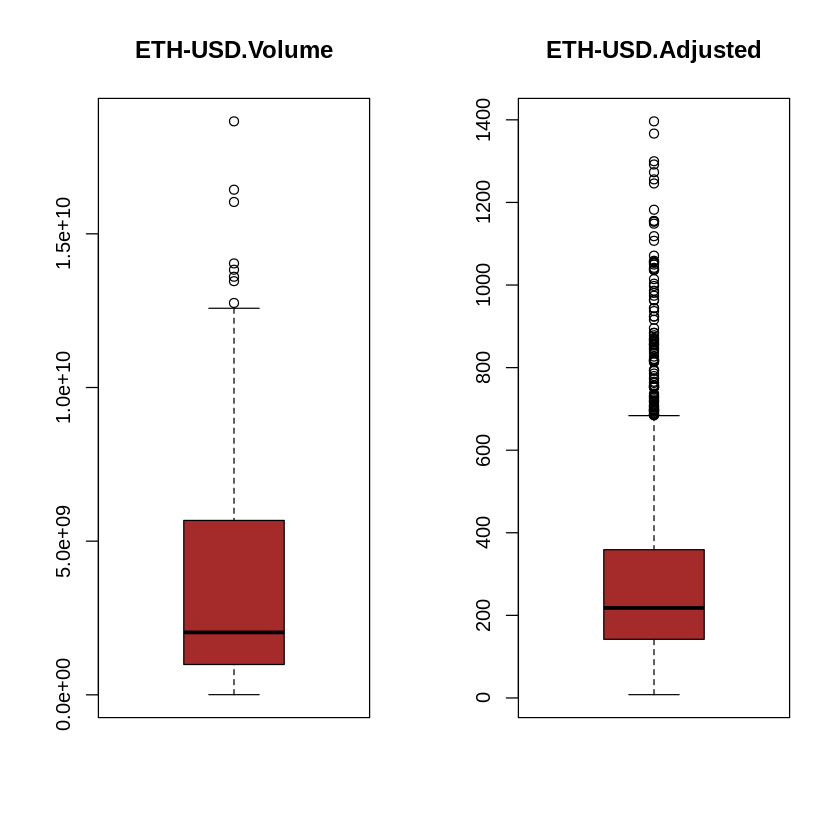

In [27]:
#Outlier Detection in the Etherium DF
par(mfrow=c(1,2))
for(i in 1:6) {
	boxplot(crypto$`ETH-USD`[,i], main=names(crypto$`ETH-USD`)[i], col = "brown")}

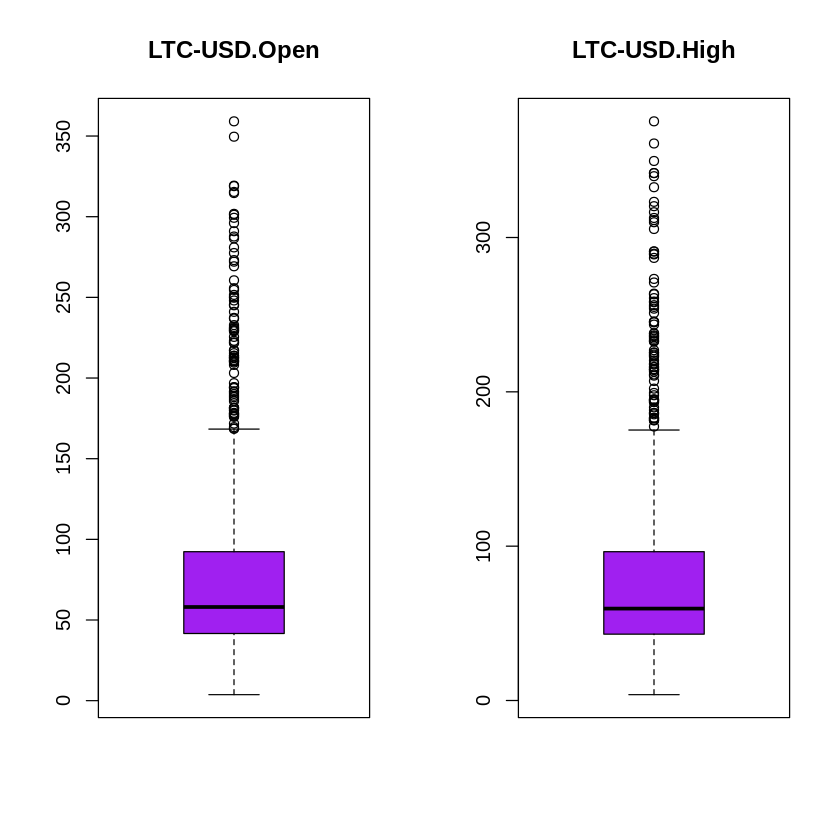

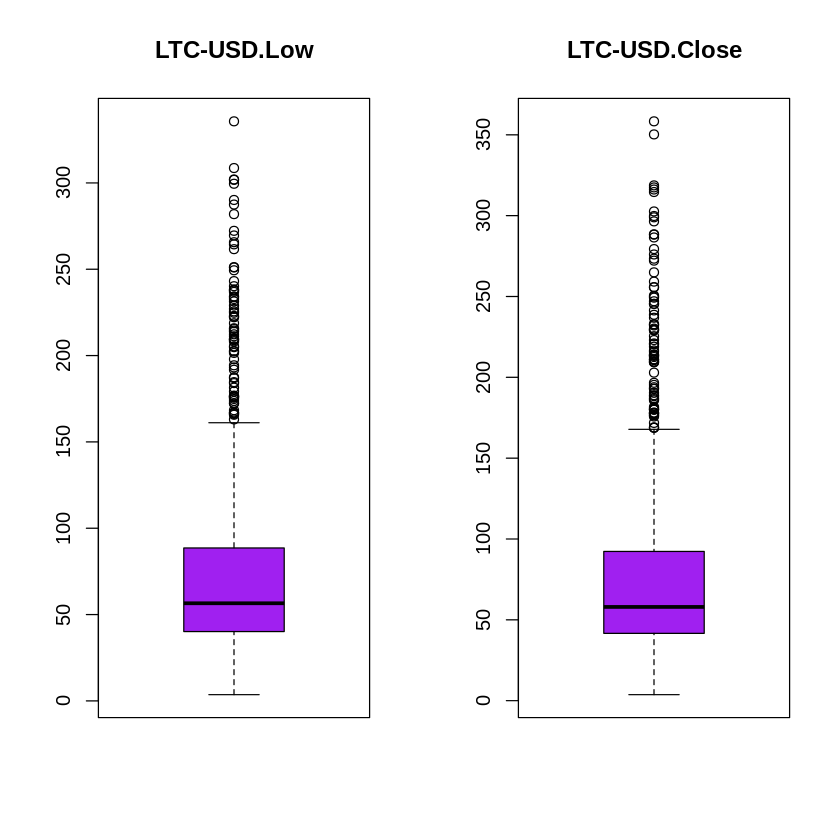

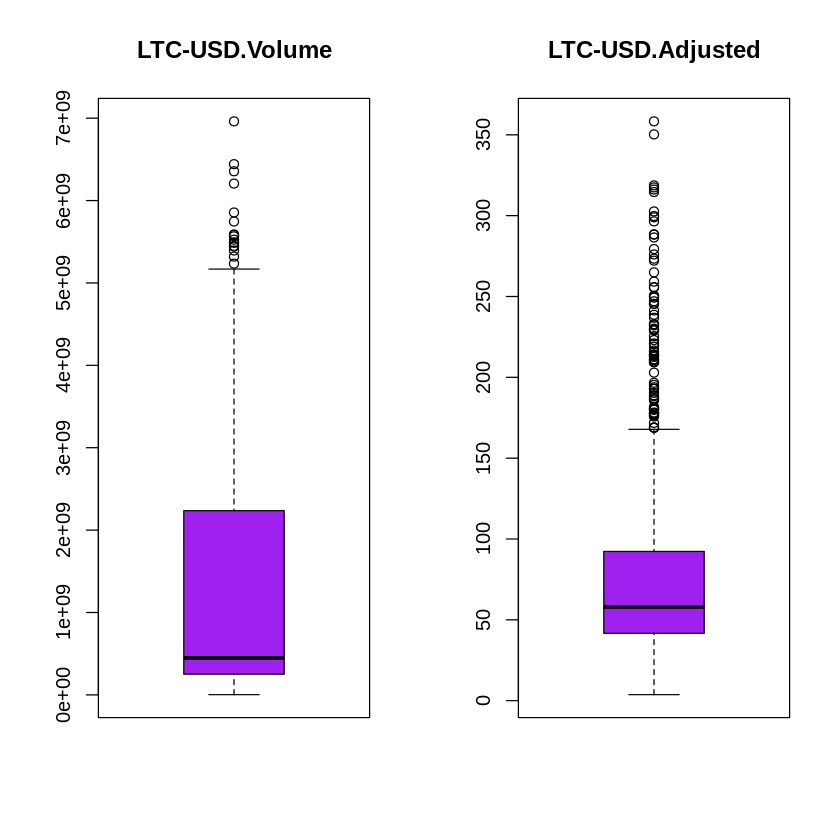

In [28]:
#Outlier Detection in the Bitcoin DF
par(mfrow=c(1,2))
for(i in 1:6) {
	boxplot(crypto$`LTC-USD`[,i], main=names(crypto$`LTC-USD`)[i], col = "purple")}

Although we clearly have outliers in the Bitcoin, Etherium and Lite Coin Data Frames, we make the decision of not dropping them as they represent actually prices registered by the three cryptocurrencies. The consequences of curing the outlier problem would be dire than inaction. 

# **Feature Engineering**

In [29]:
#Merging Open Column for all the cryptos
open <- lapply(crypto, Op)
open <- do.call(merge, open)
head(open)

           BTC.USD.Open ETH.USD.Open LTC.USD.Open
2016-12-31      960.627      8.15115      4.39233
2017-01-01      963.658      7.98231      4.32912
2017-01-02      998.617      8.17087      4.52045
2017-01-03     1021.600      8.37458      4.65588
2017-01-04     1044.400      9.70929      4.63375
2017-01-05     1156.730     11.28680      4.91437

In [30]:
#Merging High Column for all the cryptos
high <- lapply(crypto, Hi)
high <- do.call(merge, high)
head(high)

           BTC.USD.High ETH.USD.High LTC.USD.High
2016-12-31      963.743      8.15856      4.40377
2017-01-01     1003.080      8.47123      4.52153
2017-01-02     1031.390      8.43633      4.73766
2017-01-03     1044.080      9.99680      4.73184
2017-01-04     1159.420     11.27640      4.83785
2017-01-05     1191.100     11.89090      4.94586

In [31]:
#Merging Low Column for all the cryptos
low <- lapply(crypto, Lo)
low <- do.call(merge, low)
head(low)

           BTC.USD.Low ETH.USD.Low LTC.USD.Low
2016-12-31     947.236     7.90938     4.28693
2017-01-01     958.699     7.98231     4.32871
2017-01-02     996.702     8.05441     4.48466
2017-01-03    1021.600     8.31717     4.56487
2017-01-04    1044.400     9.55981     4.63375
2017-01-05     910.417     9.40268     4.22687

In [32]:
#Merging Volume Column for all the cryptos
volume <- lapply(crypto, Vo)
volume <- do.call(merge, volume)
head(volume)

           BTC.USD.Volume ETH.USD.Volume LTC.USD.Volume
2016-12-31       99135104        9066800        9210720
2017-01-01      147775008       14731700       11337500
2017-01-02      222184992       14579600       14595300
2017-01-03      185168000       33625200       10055700
2017-01-04      344945984       41051200       13762400
2017-01-05      510199008       41557400       19196000

In [33]:
#Deriving useful columns for Analysis
adjusted <- lapply(crypto, Ad)
adjusted <- do.call(merge, adjusted)
head(adjusted)

           BTC.USD.Adjusted ETH.USD.Adjusted LTC.USD.Adjusted
2016-12-31          963.743          7.96910          4.32529
2017-01-01          998.325          8.17257          4.51159
2017-01-02         1021.750          8.37851          4.64894
2017-01-03         1043.840          9.72525          4.62620
2017-01-04         1154.730         11.25160          4.83785
2017-01-05         1013.380         10.25440          4.29272

In [55]:
crypto_train <-lapply(c("BTC-USD", "ETH-USD", "LTC-USD"), function(x) {getSymbols(x, 
                                                 from = "2016/12/31", 
                                                 to = "2018/01/01",
                                                 periodicity = "daily",
                                                 auto.assign=FALSE)} )
names(crypto_train) <- c("BTC-USD", "ETH-USD", "LTC-USD")

In [56]:
crypto_test <-lapply(c("BTC-USD", "ETH-USD", "LTC-USD"), function(x) {getSymbols(x, 
                                                 from = "2018/01/02", 
                                                 to = "2020/01/01",
                                                 periodicity = "daily",
                                                 auto.assign=FALSE)} )
names(crypto_test) <- c("BTC-USD", "ETH-USD", "LTC-USD")

In [57]:
ad_train <- lapply(crypto_train, Ad)
ad_train <- do.call(merge, ad_train)
head(ad_train)

           BTC.USD.Adjusted ETH.USD.Adjusted LTC.USD.Adjusted
2016-12-31          963.743          7.96910          4.32529
2017-01-01          998.325          8.17257          4.51159
2017-01-02         1021.750          8.37851          4.64894
2017-01-03         1043.840          9.72525          4.62620
2017-01-04         1154.730         11.25160          4.83785
2017-01-05         1013.380         10.25440          4.29272

In [58]:
ad_test <- lapply(crypto_test, Ad)
ad_test <- do.call(merge, ad_test)
head(ad_test)

           BTC.USD.Adjusted ETH.USD.Adjusted LTC.USD.Adjusted
2018-01-02          14982.1          884.444          255.684
2018-01-03          15201.0          962.720          245.368
2018-01-04          15599.2          980.922          241.370
2018-01-05          17429.5          997.720          249.271
2018-01-06          17527.0         1041.680          296.454
2018-01-07          16477.6         1153.170          288.451

# **6. Exploratory Data Analysis**

# **Univariate Analysis**

In [34]:
summary(crypto$`BTC-USD`)

     Index             BTC-USD.Open      BTC-USD.High      BTC-USD.Low     
 Min.   :2016-12-31   Min.   :  775.2   Min.   :  823.3   Min.   :  755.8  
 1st Qu.:2017-10-01   1st Qu.: 3671.4   1st Qu.: 3743.4   1st Qu.: 3619.2  
 Median :2018-07-02   Median : 6478.9   Median : 6567.5   Median : 6373.4  
 Mean   :2018-07-02   Mean   : 6314.9   Mean   : 6489.8   Mean   : 6124.6  
 3rd Qu.:2019-04-02   3rd Qu.: 8419.9   3rd Qu.: 8627.7   3rd Qu.: 8196.4  
 Max.   :2020-01-01   Max.   :19475.8   Max.   :20089.0   Max.   :18974.1  
 BTC-USD.Close     BTC-USD.Volume      BTC-USD.Adjusted 
 Min.   :  777.8   Min.   :6.085e+07   Min.   :  777.8  
 1st Qu.: 3671.2   1st Qu.:2.219e+09   1st Qu.: 3671.2  
 Median : 6480.4   Median :5.302e+09   Median : 6480.4  
 Mean   : 6320.4   Mean   :8.394e+09   Mean   : 6320.4  
 3rd Qu.: 8424.3   3rd Qu.:1.368e+10   3rd Qu.: 8424.3  
 Max.   :19497.4   Max.   :4.511e+10   Max.   :19497.4  

In [35]:
summary(crypto$`ETH-USD`)

     Index             ETH-USD.Open       ETH-USD.High       ETH-USD.Low      
 Min.   :2016-12-31   Min.   :   7.982   Min.   :   8.159   Min.   :   7.909  
 1st Qu.:2017-10-01   1st Qu.: 142.139   1st Qu.: 145.857   1st Qu.: 138.307  
 Median :2018-07-02   Median : 217.897   Median : 225.324   Median : 209.606  
 Mean   :2018-07-02   Mean   : 295.954   Mean   : 306.738   Mean   : 283.674  
 3rd Qu.:2019-04-02   3rd Qu.: 358.507   3rd Qu.: 372.137   3rd Qu.: 341.417  
 Max.   :2020-01-01   Max.   :1397.480   Max.   :1432.880   Max.   :1290.600  
 ETH-USD.Close      ETH-USD.Volume      ETH-USD.Adjusted  
 Min.   :   7.969   Min.   :4.690e+06   Min.   :   7.969  
 1st Qu.: 142.093   1st Qu.:9.863e+08   1st Qu.: 142.093  
 Median : 218.050   Median :2.030e+09   Median : 218.050  
 Mean   : 295.984   Mean   :3.330e+09   Mean   : 295.984  
 3rd Qu.: 359.005   3rd Qu.:5.674e+09   3rd Qu.: 359.005  
 Max.   :1396.420   Max.   :1.866e+10   Max.   :1396.420  

In [36]:
summary(crypto$`LTC-USD`)

     Index             LTC-USD.Open      LTC-USD.High      LTC-USD.Low     
 Min.   :2016-12-31   Min.   :  3.714   Min.   :  3.769   Min.   :  3.614  
 1st Qu.:2017-10-01   1st Qu.: 41.643   1st Qu.: 42.980   1st Qu.: 40.174  
 Median :2018-07-02   Median : 58.051   Median : 59.529   Median : 56.542  
 Mean   :2018-07-02   Mean   : 75.050   Mean   : 78.103   Mean   : 71.696  
 3rd Qu.:2019-04-02   3rd Qu.: 92.328   3rd Qu.: 96.420   3rd Qu.: 88.566  
 Max.   :2020-01-01   Max.   :359.125   Max.   :375.286   Max.   :335.675  
 LTC-USD.Close     LTC-USD.Volume      LTC-USD.Adjusted 
 Min.   :  3.715   Min.   :2.629e+06   Min.   :  3.715  
 1st Qu.: 41.641   1st Qu.:2.512e+08   1st Qu.: 41.641  
 Median : 57.982   Median :4.481e+08   Median : 57.982  
 Mean   : 75.064   Mean   :1.191e+09   Mean   : 75.064  
 3rd Qu.: 92.312   3rd Qu.:2.236e+09   3rd Qu.: 92.312  
 Max.   :358.336   Max.   :6.962e+09   Max.   :358.336  

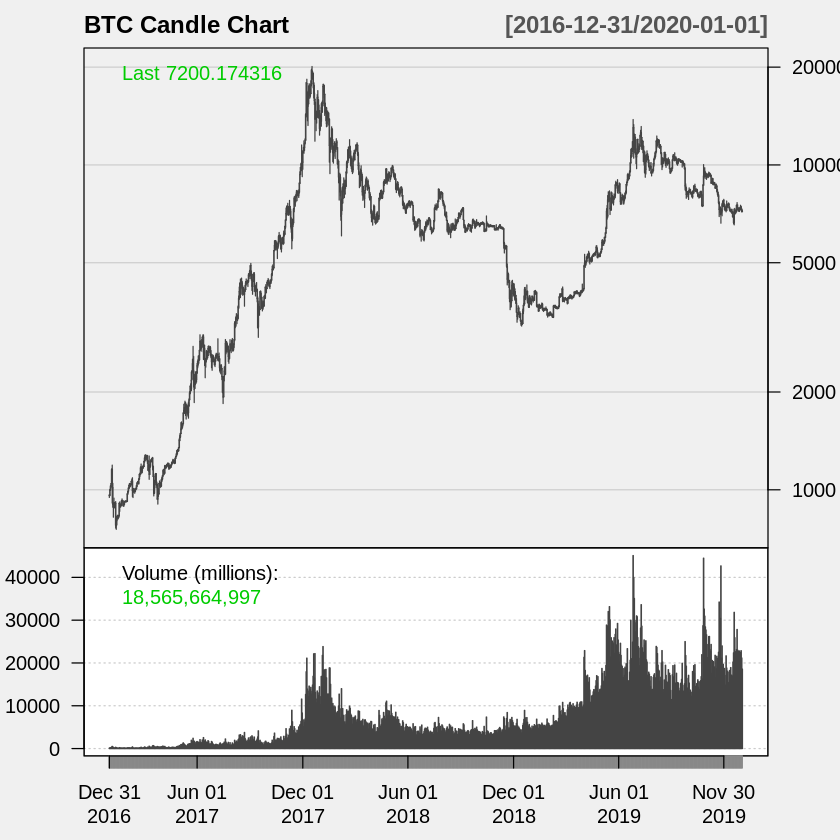

In [37]:
#Candle Chart of Bitcoin over the year

candleChart(crypto$`BTC-USD`, col=TRUE, theme=chartTheme('white'), log.scale=TRUE, name="BTC Candle Chart" )

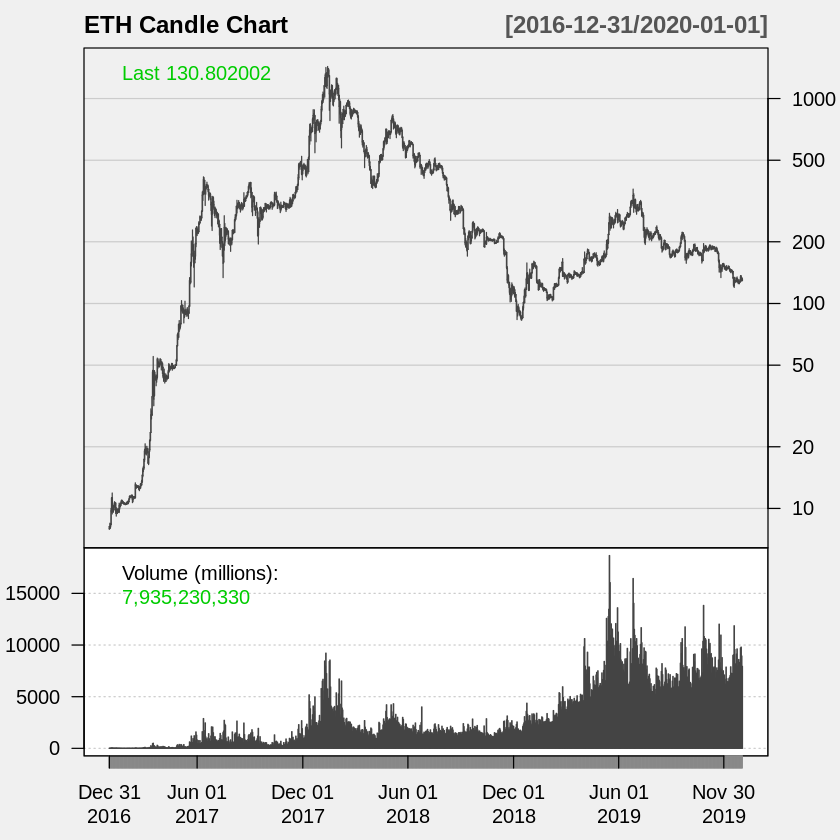

In [38]:
#Candle Chart of Etherium over the years

candleChart(crypto$`ETH-USD`, col=TRUE, theme=chartTheme('white'), log.scale=TRUE, name="ETH Candle Chart")

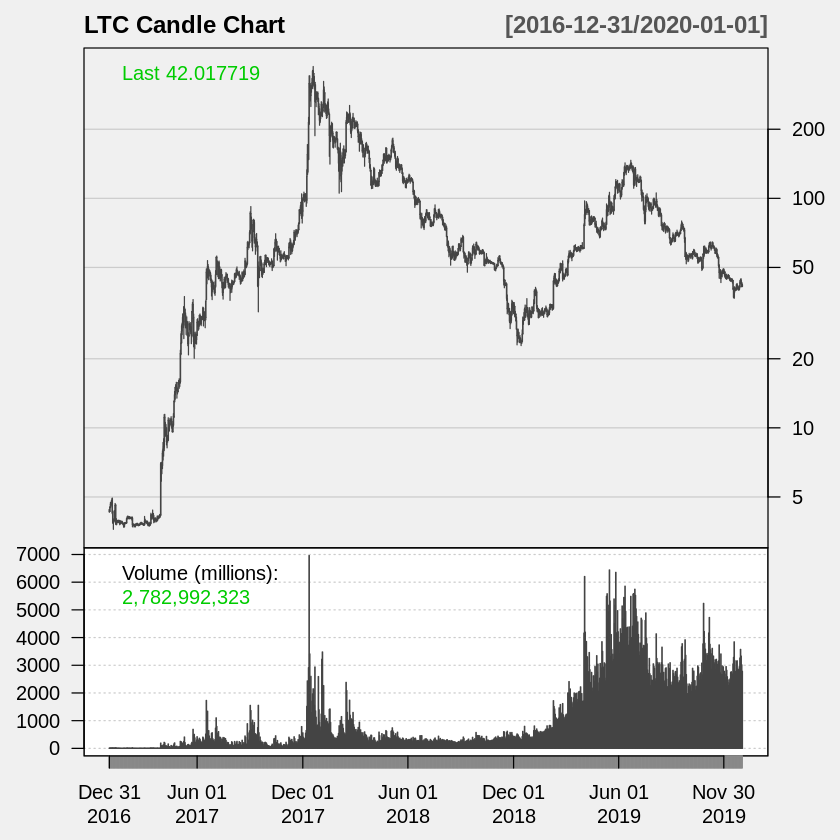

In [39]:
#Candle Chart of Lite Coin over the years

candleChart(crypto$`LTC-USD`, col=TRUE, theme=chartTheme('white'), log.scale=TRUE, name="LTC Candle Chart")

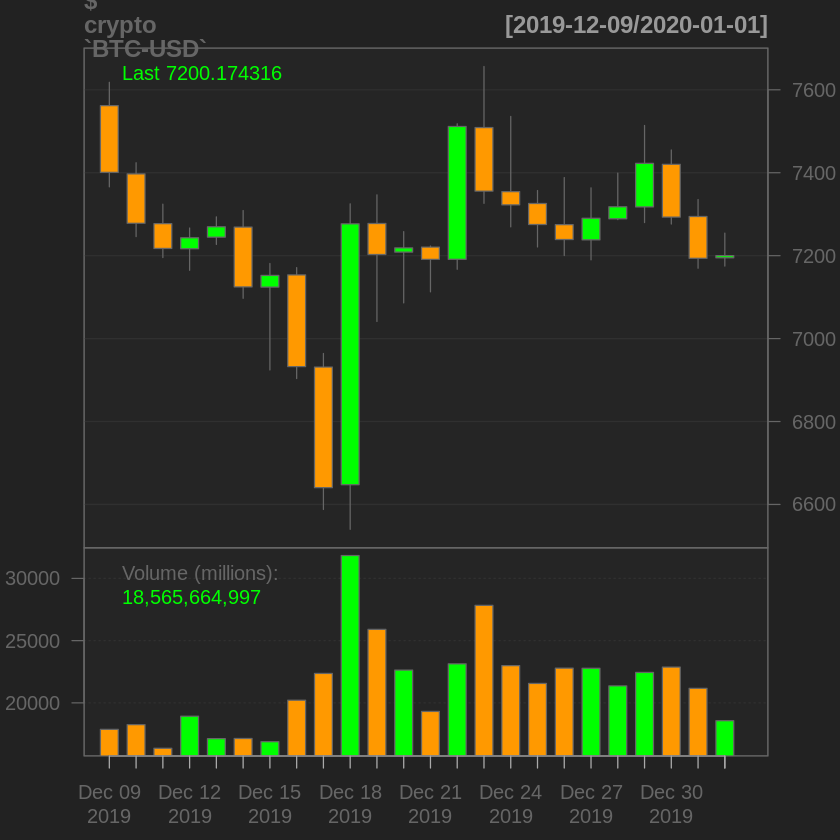

In [41]:
#Chart Series for Bitcoin for the last 4 weeks
chartSeries(crypto$`BTC-USD`, subset='last 4 weeks')

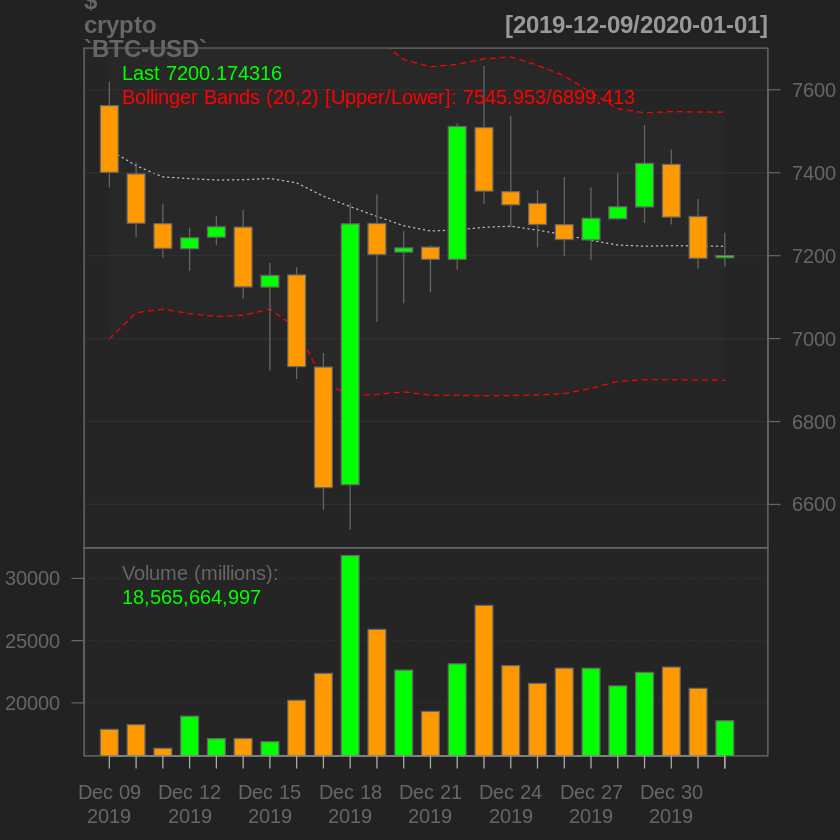

In [42]:
addBBands()

# **Bivariate Analysis**

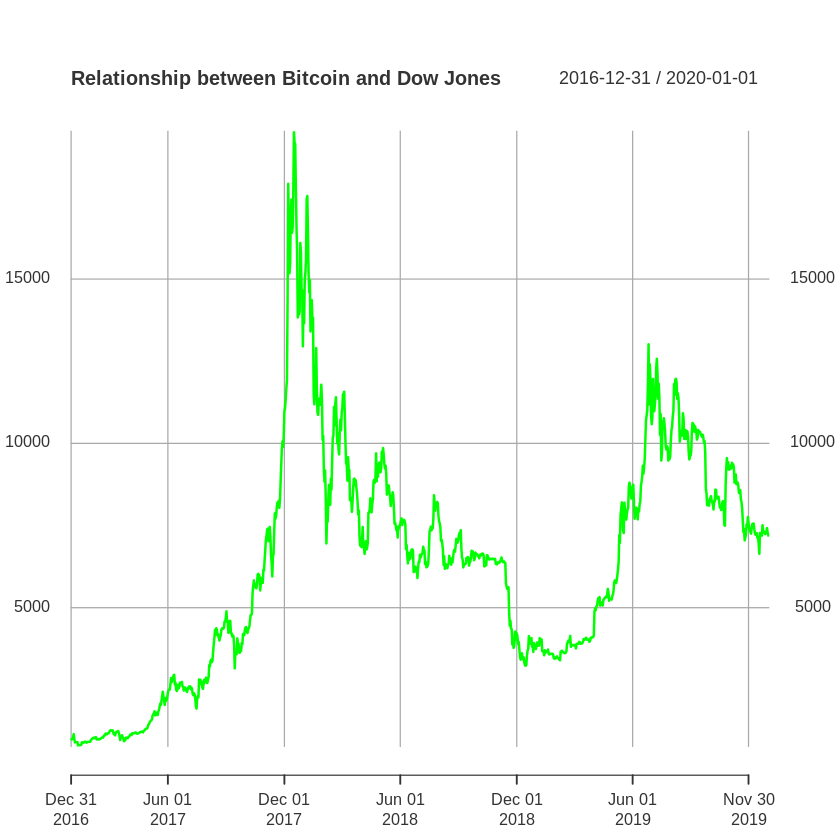

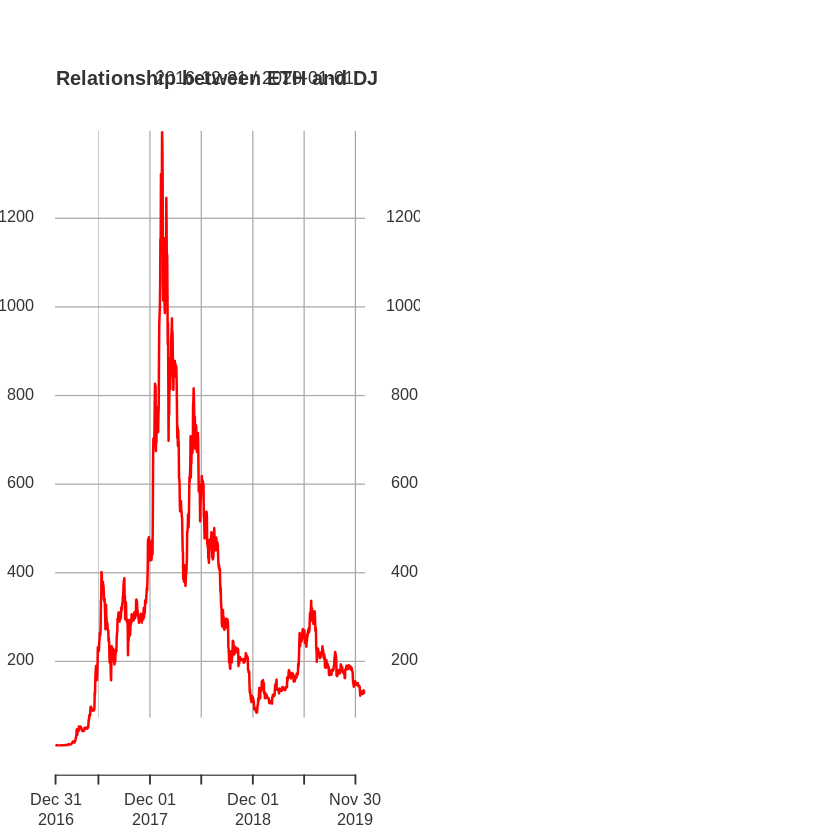

In [43]:
plot(adjusted$BTC.USD.Adjusted, djia$DJIA.Adjusted, pch =19, col= "green", main = "Relationship between Bitcoin and Dow Jones")

par(mfrow = c(1,2))

plot(adjusted$ETH.USD.Adjusted, djia$DJIA.Adjusted, pch =19, col= "red", main = "Relationship between ETH and DJIA Close")

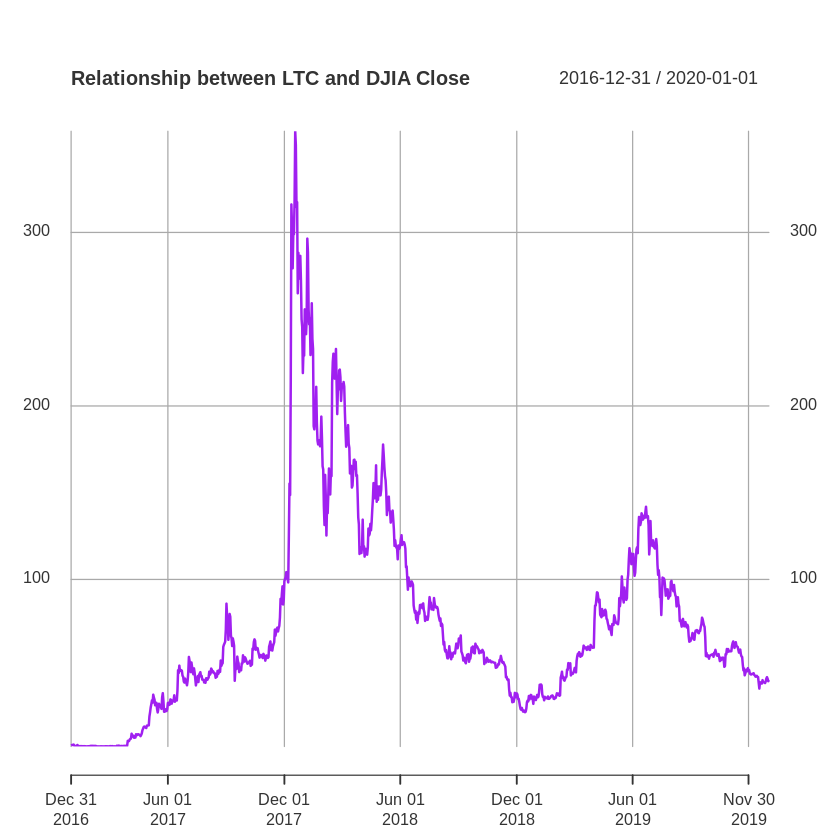

In [129]:

plot(adjusted$LTC.USD.Adjusted, djia$DJIA.Adjusted, pch =19, col= "purple", main = "Relationship between LTC and DJIA Close")

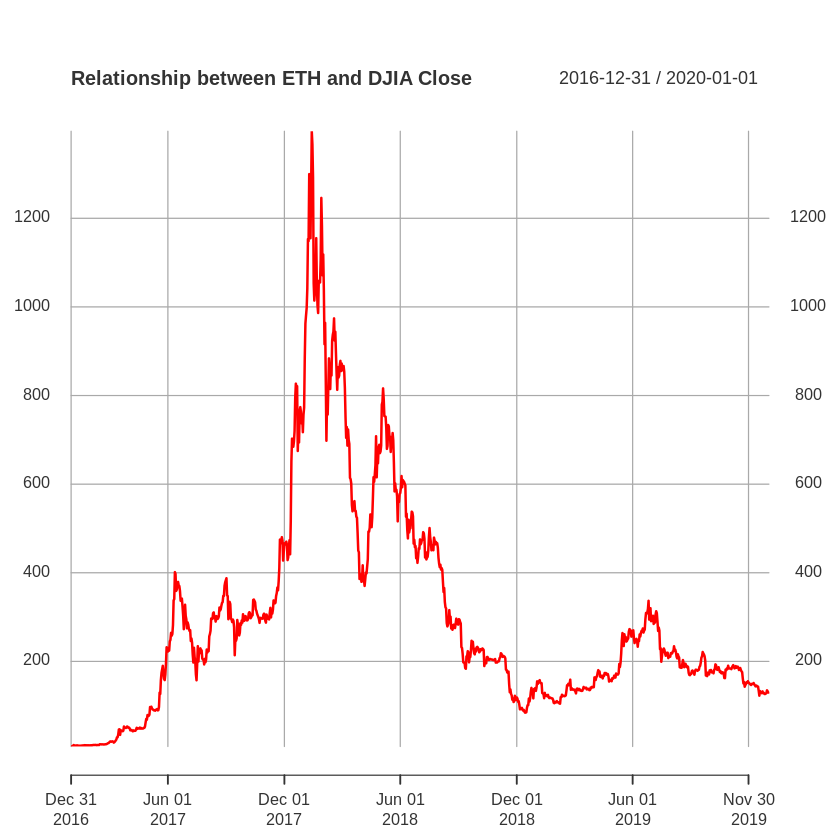

In [128]:
plot(adjusted$ETH.USD.Adjusted, djia$DJIA.Adjusted, pch =19, col= "red", main = "Relationship between ETH and DJIA Close")

# **7. Modelling**

# **Neural Networks for Forecasting**

**Bitcoin**

In [45]:
install.packages('forecast', dependencies = TRUE)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘x13binary’, ‘fracdiff’, ‘timeDate’, ‘tseries’, ‘urca’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’




In [92]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
head(adjusted)

           BTC.USD.Adjusted ETH.USD.Adjusted LTC.USD.Adjusted
2016-12-31          963.743          7.96910          4.32529
2017-01-01          998.325          8.17257          4.51159
2017-01-02         1021.750          8.37851          4.64894
2017-01-03         1043.840          9.72525          4.62620
2017-01-04         1154.730         11.25160          4.83785
2017-01-05         1013.380         10.25440          4.29272

In [49]:
ncol(adjusted)

[1] 3

In [53]:
class(adjusted$BTC.USD.Adjusted)

[1] "xts" "zoo"

**Data Preparation**

In [71]:
install.packages('TSstudio')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hts’, ‘iterators’, ‘later’, ‘thief’, ‘doParallel’, ‘foreach’, ‘globals’, ‘listenv’, ‘parallelly’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘anytime’, ‘forecastHybrid’, ‘future’, ‘future.apply’, ‘plotly’, ‘tsibble’, ‘viridis’




In [72]:
library(TSstudio)

In [82]:
#Training Data

#Training Dataset window is from 2016 to 2018

btc.train <- ad_train$BTC.USD.Adjusted

In [83]:
head(btc.train)

           BTC.USD.Adjusted
2016-12-31          963.743
2017-01-01          998.325
2017-01-02         1021.750
2017-01-03         1043.840
2017-01-04         1154.730
2017-01-05         1013.380

In [84]:
btc.clean <- xts_to_ts(btc.train, start = as.Date("1980-01-01"), frequency = 12 )

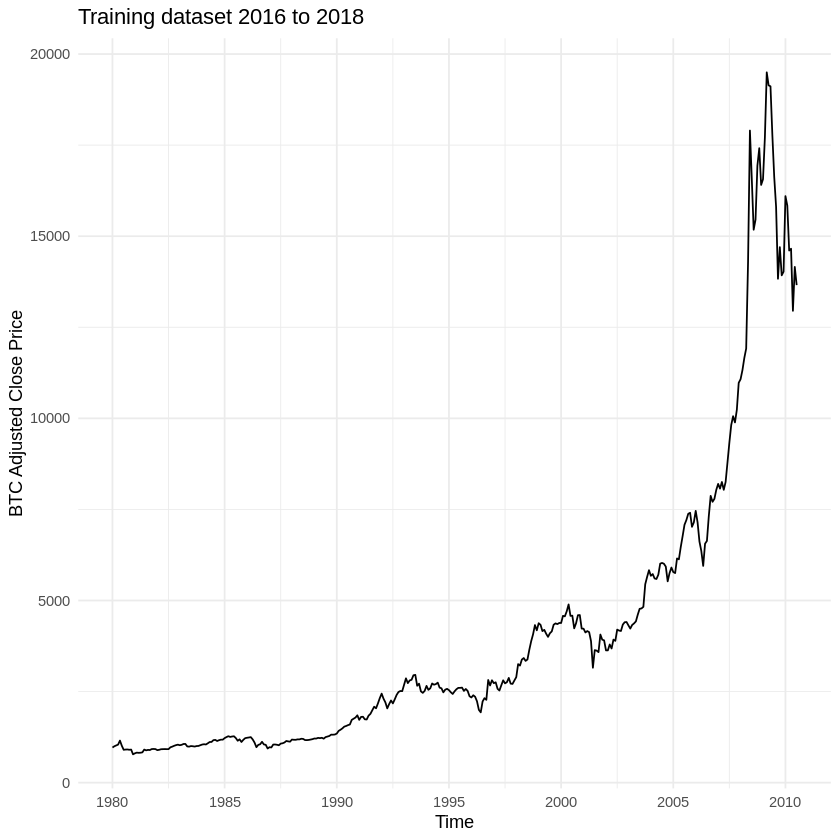

In [102]:
autoplot(btc.clean) +
  ylab("BTC Adjusted Close Price") +
  ggtitle("Training dataset 2016 to 2018") +
  theme_minimal()

In [ ]:
##testing data
btc_test <- xts_to_ts(btc.test, start = as.Date("1980-01-01"), frequency = 12 )

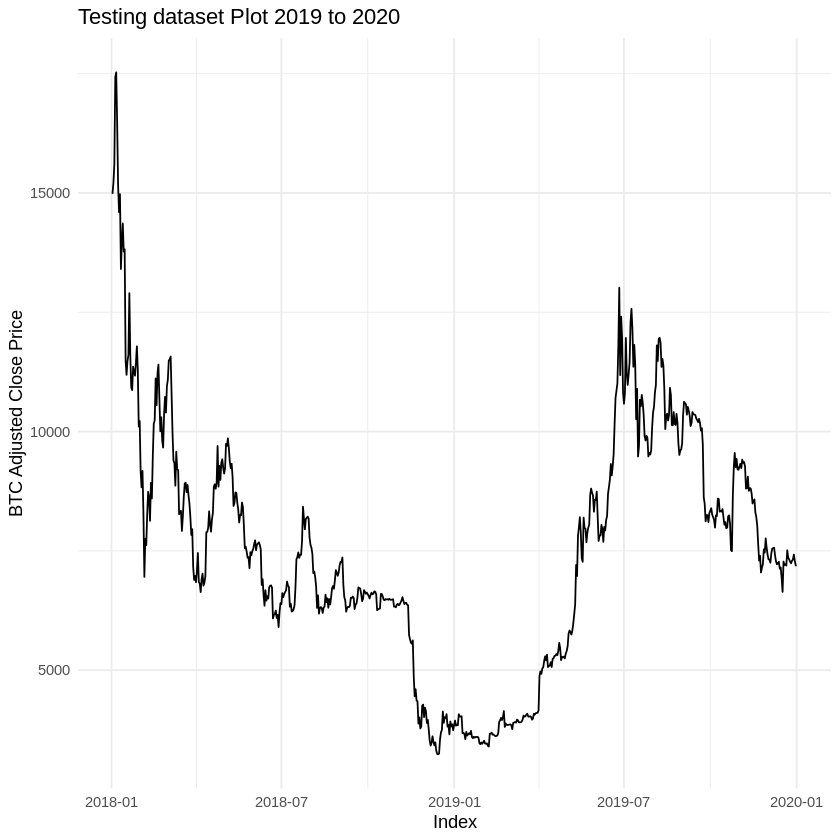

In [103]:
autoplot(btc.test) +
  ylab("BTC Adjusted Close Price") +
  ggtitle("Testing dataset Plot 2019 to 2020") +
  theme_minimal()

# **Fitting Model & Forecasting**

In [86]:
# Fitting nnetar model
btc.fit.nnetar <- nnetar(btc.clean)

In [87]:
#Forecasting
btc.fcst.nnetar <- forecast(btc.fit.nnetar, h =35)

In [ ]:
autoplot()

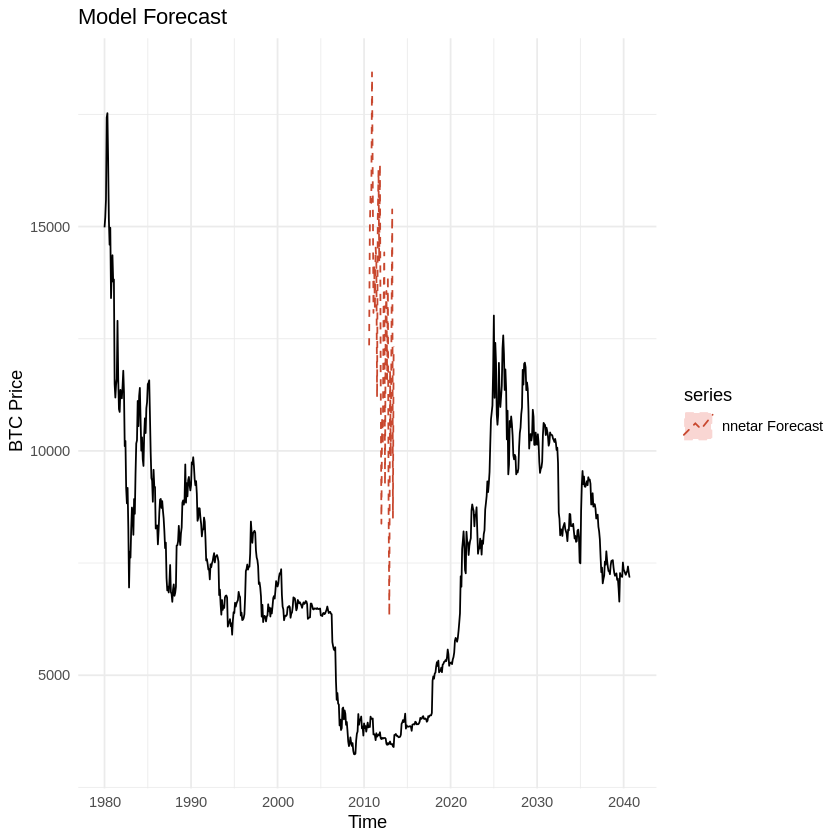

In [120]:
#Predictions
autoplot(btc_test) + 
  autolayer(btc.fcst.nnetar, series ="nnetar Forecast", linetype = "dashed") +
  ggtitle("Model Forecast") +
  theme_minimal() + ylab(" BTC Price")

In [97]:
#Using Multi-Layer Perceptrons
install.packages('nnfor')
library(nnfor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppParallel’, ‘lamW’, ‘texreg’, ‘greybox’, ‘pracma’, ‘statmod’, ‘smooth’, ‘shape’, ‘Deriv’, ‘MAPA’, ‘glmnet’, ‘neuralnet’, ‘plotrix’, ‘tsutils’




In [98]:
#Fitting MLP Model

btc.fit.mlp <- mlp(btc.clean)

In [99]:
#Forecasting
btc.fcst.mlp <- forecast(btc.fit.mlp, h = 35)

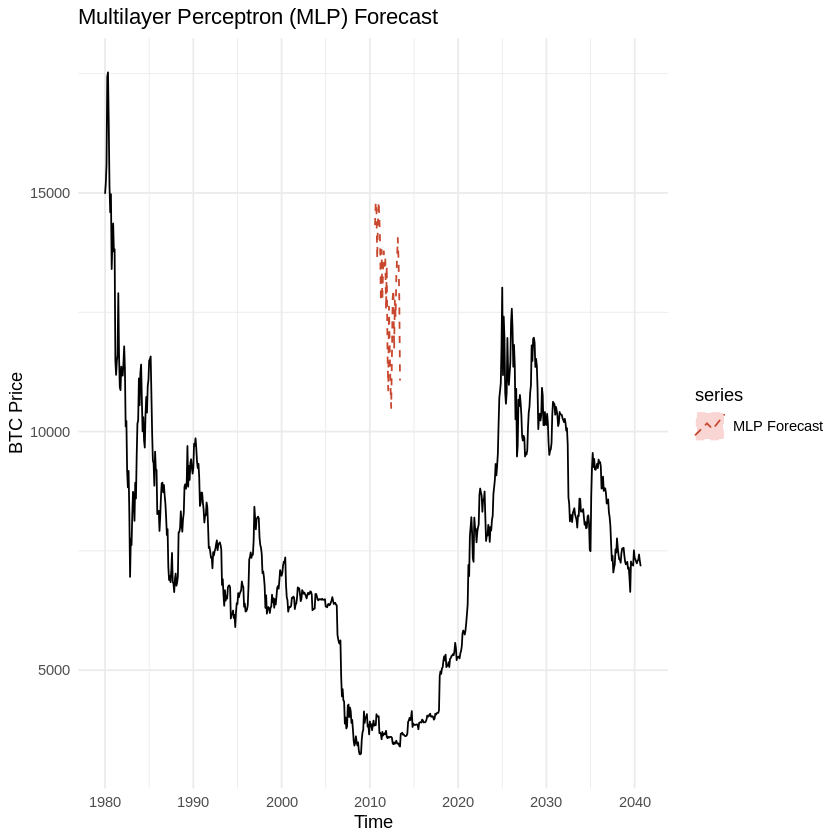

In [119]:
#Visualize Model Predictions
autoplot(btc_test) + autolayer(btc.fcst.mlp, series =  "MLP Forecast", linetype = "dashed") +
ggtitle("Multilayer Perceptron (MLP) Forecast") +
theme_minimal() + ylab("BTC Price")

**Etherium**

In [106]:
#Training Dataset window is from 2016 to 2018

eth.train <- ad_train$ETH.USD.Adjusted

In [107]:
eth.clean <- xts_to_ts(eth.train, start = as.Date("1980-01-01"), frequency = 12 )

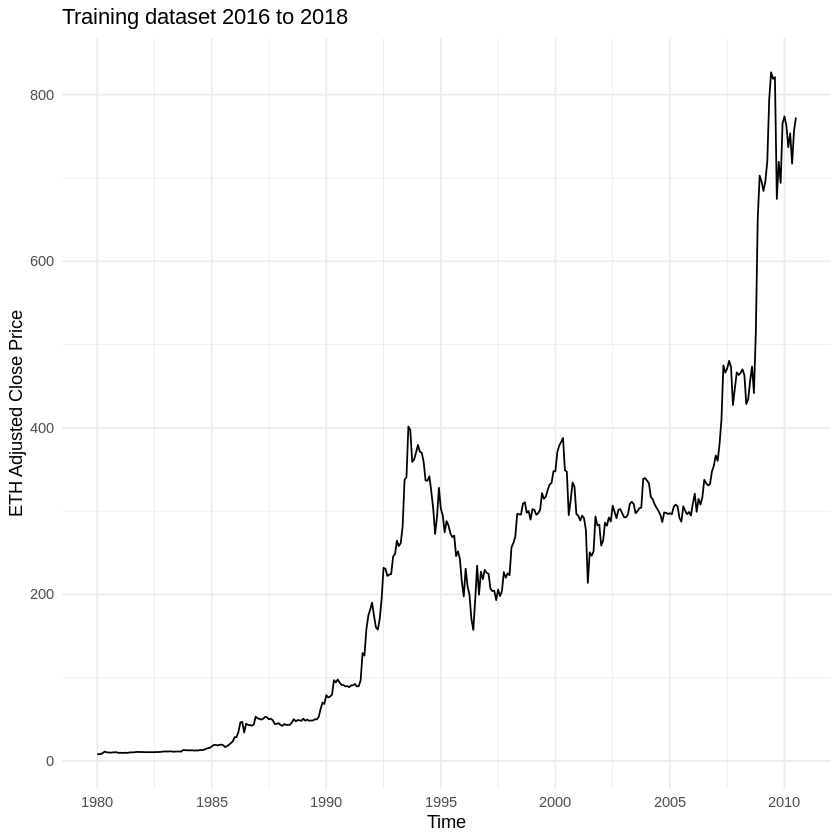

In [108]:
autoplot(eth.clean) +
  ylab("ETH Adjusted Close Price") +
  ggtitle("Training dataset 2016 to 2018") +
  theme_minimal()

In [109]:
#Test data 2018 onwards
eth.test <- ad_test$ETH.USD.Adjusted

In [124]:
#Convert eth.test from xt to ts
eth_test <- xts_to_ts(eth.test, start = as.Date("1980-01-01"), frequency = 12 )

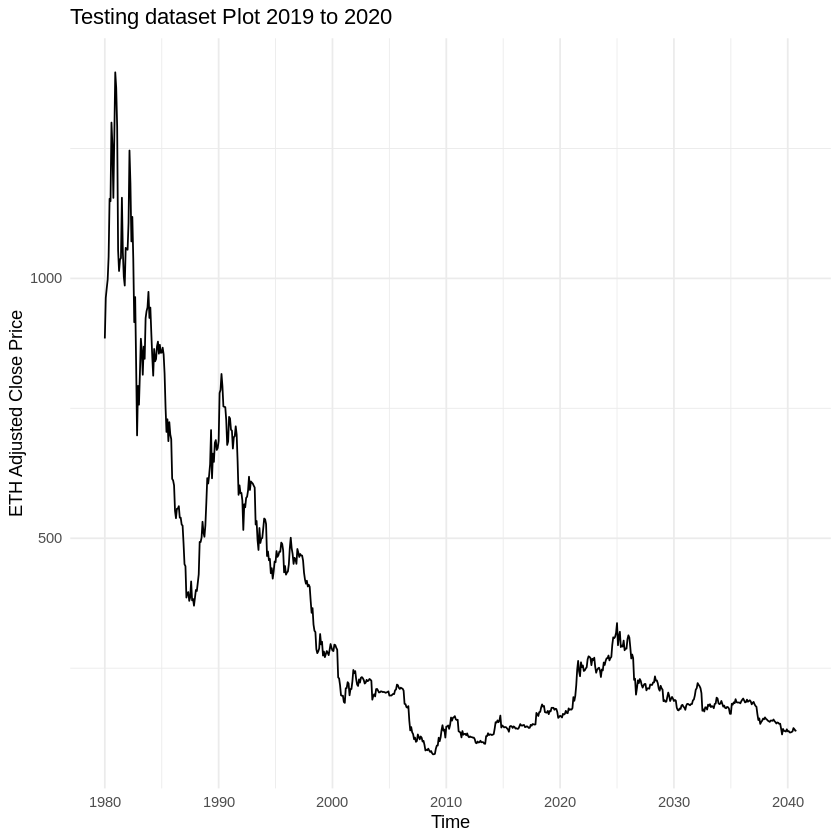

In [125]:
autoplot(eth_test) +
  ylab("ETH Adjusted Close Price") +
  ggtitle("Testing dataset Plot 2019 to 2020") +
  theme_minimal()

In [113]:
# Fitting nnetar model
eth.fit.nnetar <- nnetar(eth.clean)

In [114]:
#Forecasting
eth.fcst.nnetar <- forecast(eth.fit.nnetar, h =35)

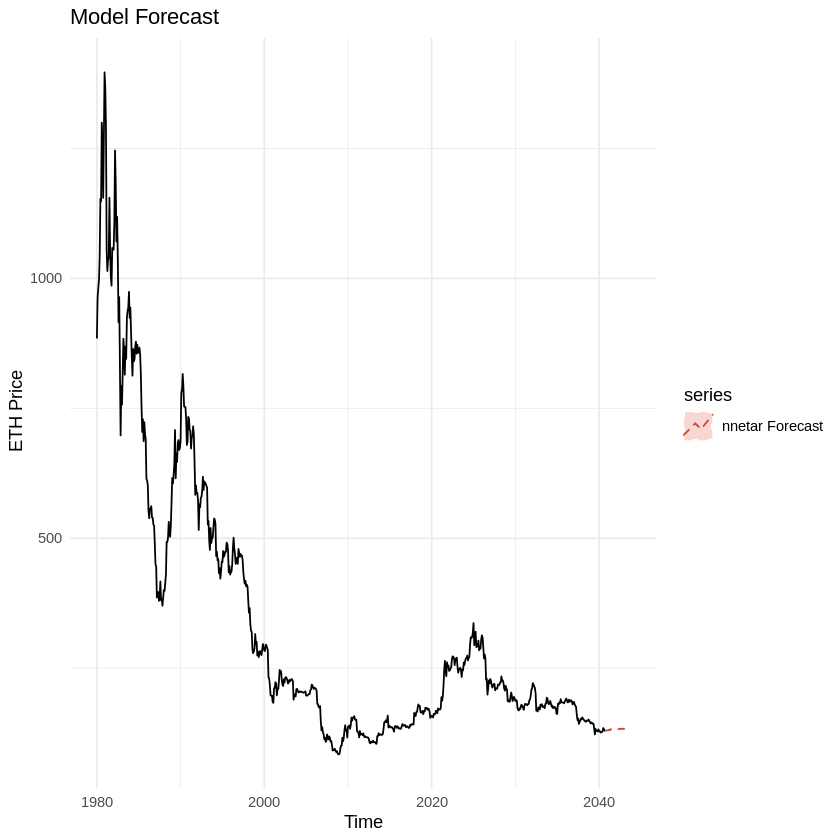

In [126]:
#Visualizing Predictions
autoplot(eth_test) + 
  autolayer(eth.fcst.nnetar, series ="nnetar Forecast", linetype = "dashed") +
  ggtitle("Model Forecast") +
  theme_minimal() + ylab(" ETH Price")